<a href="https://colab.research.google.com/github/DumbGreenTea/IA_homerowk4/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Cargar el dataset
paltos = np.load('/content/sample_data/paltos.npy', allow_pickle=True)
#paltos = np.load('data_source_url', allow_pickle=True) #En caso de tener otra dirección copiar, pegar y cambiar data_source_url por la dirección que tenga tu archivo


In [86]:
#Titulo
display(HTML("<h1>Array de Paltos</h1>"))

#Mostrar data del array en crudo
print(paltos)


[['arbol_1' -71.04884881461739 -32.84038990910421]
 ['arbol_2' -71.04958858366999 -32.8404821794963]
 ['arbol_3' -71.04980926215778 -32.8404058633257]
 ['arbol_4' -71.0504699980531 -32.8405182859727]
 ['arbol_5' -71.04922664888424 -32.841015251972266]
 ['arbol_6' -71.04926942588176 -32.84039520943775]
 ['arbol_7' -71.05106578768262 -32.84165715069143]
 ['arbol_8' -71.05020361505561 -32.84156011856145]
 ['arbol_9' -71.05126745558296 -32.84087006184975]
 ['arbol_10' -71.04878320531743 -32.84040113716143]
 ['arbol_11' -71.04989114149105 -32.84091401967176]
 ['arbol_12' -71.04982643476353 -32.84062894259972]
 ['arbol_13' -71.0498936842084 -32.84108028071009]
 ['arbol_14' -71.04892222652431 -32.84102148268019]
 ['arbol_15' -71.05078948279294 -32.84109184771386]
 ['arbol_16' -71.04984082279348 -32.84135804156654]
 ['arbol_17' -71.0509749755355 -32.840996174799784]
 ['arbol_18' -71.05061250248175 -32.84127395801135]
 ['arbol_19' -71.04985199310713 -32.84033754789535]
 ['arbol_20' -71.05048455

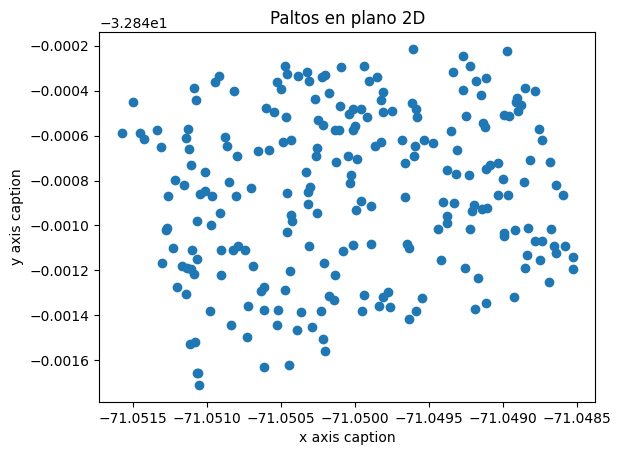

In [87]:

#Segmentaciñon de coordenadas del array
paltos_x = paltos[:,1]
paltos_y = paltos[:,2]

#Titulo
display(HTML("<h1>Paltos en un 2D</h1>"))

#Graficar los puntos en crudo
plt.title("Paltos en plano 2D")
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
plt.scatter(paltos_x, paltos_y)
plt.show()



# Preparación del entorno y configuración de la cuadricula

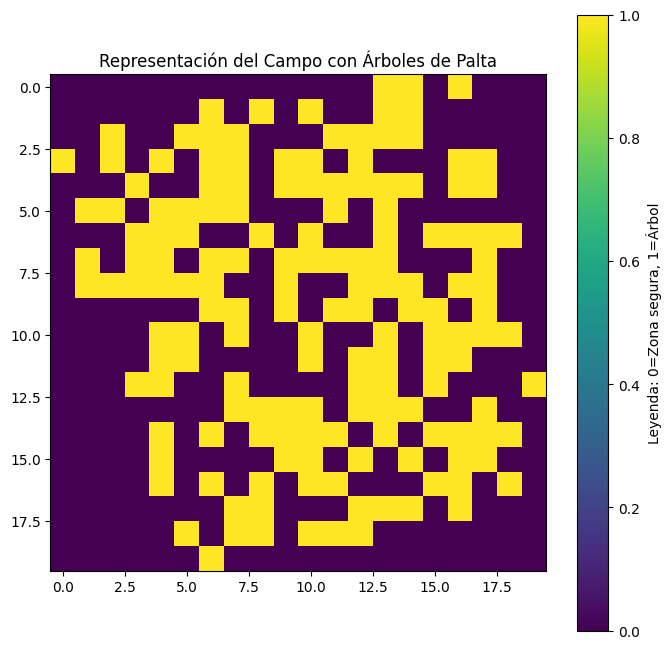

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de georreferenciación de los árboles de palta
paltos = np.load('/content/sample_data/paltos.npy', allow_pickle=True)

# Configuración inicial
grid_size = (20, 20)

# Extraer coordenadas
latitudes = paltos[:, 1].astype(float)
longitudes = paltos[:, 2].astype(float)

# Normalizar coordenadas
lat_min, lat_max = latitudes.min(), latitudes.max()
lon_min, lon_max = longitudes.min(), longitudes.max()
x_indices = ((latitudes - lat_min) / (lat_max - lat_min) * (grid_size[0] - 1)).astype(int)
y_indices = ((longitudes - lon_min) / (lon_max - lon_min) * (grid_size[1] - 1)).astype(int)

# Crear el campo e insertar árboles
campo = np.zeros(grid_size)
for x, y in zip(x_indices, y_indices):
    campo[x, y] = 1  # Árboles marcados con 1

# Definir punto de inicio del dron
inicio = (0, 0)

# Visualizar el campo inicial
plt.figure(figsize=(8, 8))
plt.imshow(campo, cmap='viridis', origin='upper')
plt.colorbar(label="Leyenda: 0=Zona segura, 1=Árbol")
plt.title("Representación del Campo con Árboles de Palta")
plt.show()


# Implementación del Algoritmo Q-Learning

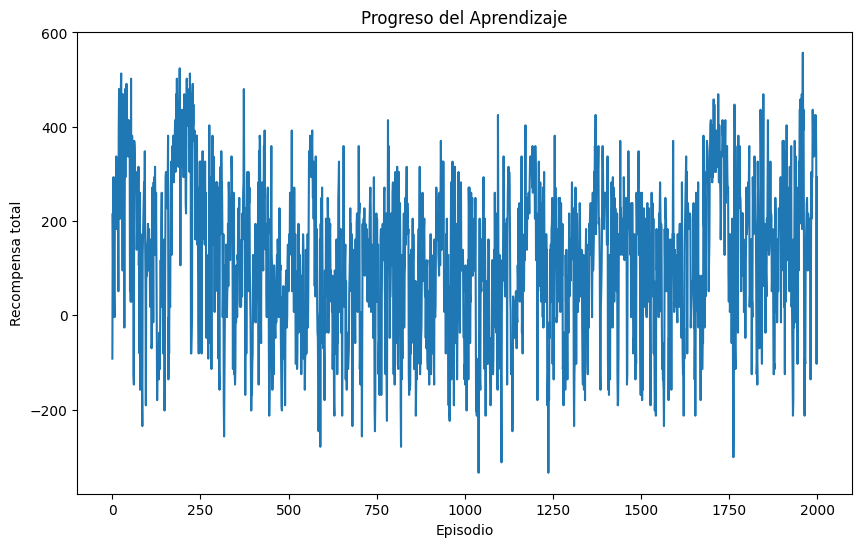

In [93]:
import random

# Parámetros del Q-Learning
alpha = 0.2         # Tasa de aprendizaje
gamma = 0.9         # Factor de descuento
epsilon = 0.3       # Probabilidad inicial de exploración
episodes = 2000     # Número de episodios de entrenamiento
max_steps = 400     # Máximo número de pasos por episodio

# Acciones posibles: arriba, abajo, izquierda, derecha
actions = ['up', 'down', 'left', 'right']
action_map = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

# Inicialización de la tabla Q
Q = np.zeros((*grid_size, len(actions)))

# Función para elegir acción (política epsilon-greedy)
def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        return random.choice(range(len(actions)))  # Acción aleatoria (exploración)
    else:
        return np.argmax(Q[state])  # Mejor acción conocida (explotación)

# Función para calcular la nueva posición después de una acción
def move(state, action):
    delta = action_map[action]
    new_state = (max(0, min(state[0] + delta[0], grid_size[0] - 1)),
                 max(0, min(state[1] + delta[1], grid_size[1] - 1)))
    return new_state

# Entrenamiento
rewards_per_episode = []
for episode in range(episodes):
    state = inicio
    total_reward = 0
    campo_temp = campo.copy()  # Copiar el campo para cada episodio

    for step in range(max_steps):
        action_index = choose_action(state, epsilon)
        action = actions[action_index]
        new_state = move(state, action)

        if campo_temp[new_state] == 1:  # Árbol no fumigado
            reward = 10
            campo_temp[new_state] = 0
        else:  # Movimiento normal
            reward = -1

        # Actualizar tabla Q
        best_future_q = np.max(Q[new_state])
        Q[state][action_index] += alpha * (reward + gamma * best_future_q - Q[state][action_index])

        state = new_state
        total_reward += reward

        # Verificar condición de finalización
        if np.all(campo_temp != 1):  # Todos los árboles fumigados
            break

    # Reducir epsilon gradualmente
    epsilon = max(0.1, epsilon * 0.99)
    rewards_per_episode.append(total_reward)

# Graficar recompensas por episodio
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_episode)
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Progreso del Aprendizaje")
plt.show()


# Visualización de la Trayectoria Óptima

El dron parece estar atrapado. Revisa el entrenamiento.


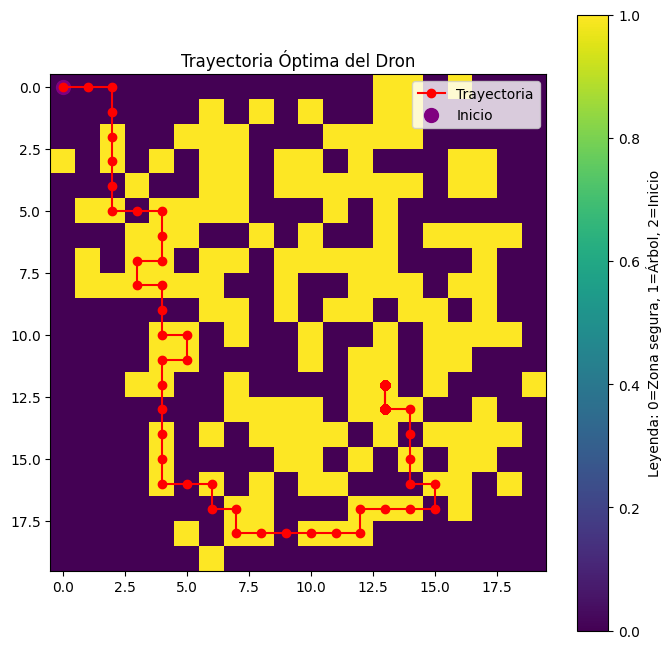

In [92]:
# Visualización de la trayectoria aprendida
def mostrar_trayectoria_optima(Q, inicio, campo):
    state = inicio
    trayectoria = [state]
    campo_visual = campo.copy()

    while np.any(campo_visual == 1):  # Mientras queden árboles por fumigar
        action_index = np.argmax(Q[state])  # Mejor acción conocida
        action = actions[action_index]
        new_state = move(state, action)

        # Marcar árbol como fumigado
        if campo_visual[new_state] == 1:
            campo_visual[new_state] = 0

        trayectoria.append(new_state)
        state = new_state

        # Condición de seguridad para evitar bucles infinitos
        if len(trayectoria) > 500:  # Arbitrario
            print("El dron parece estar atrapado. Revisa el entrenamiento.")
            break

    # Mostrar el campo con la trayectoria
    plt.figure(figsize=(8, 8))
    plt.imshow(campo, cmap='viridis', origin='upper')
    plt.colorbar(label="Leyenda: 0=Zona segura, 1=Árbol, 2=Inicio")
    x_trayectoria, y_trayectoria = zip(*trayectoria)
    plt.plot(y_trayectoria, x_trayectoria, color='red', marker='o', label='Trayectoria')
    plt.scatter(inicio[1], inicio[0], color='purple', s=100, label='Inicio')
    plt.legend()
    plt.title("Trayectoria Óptima del Dron")
    plt.show()

# Visualizar la trayectoria aprendida
mostrar_trayectoria_optima(Q, inicio, campo)


# Modelo elegido
Como sección adicional, aquí se siguen una serie de pasos para guardar y cargar el modelo en caso de que se considere que es un buen modelo y se quiera utilizar en tiemp real. Creo que también se pueden utilizar librerías adicionales para hacer este proceso más sencillo y flexible, pero aquí utilizamos uno que encontramos en un foro de internet.


## Guardar modelo

In [76]:
# Guardar la tabla Q en un archivo
np.save('tabla_q.npy', Q)
print("Modelo Q-Learning guardado como 'tabla_q.npy'")

## Cargar modelo

In [ ]:
# Cargar la tabla Q desde un archivo
Q = np.load('tabla_q.npy')
print("Modelo Q-Learning cargado correctamente")
